# Import relevant packages

In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

`cv2` corresponds to OpenCV (https://opencv.org/), an Open Source Computer Vision Library with a huge variety of tools for computer vision.

# Explore your image

## Read image

In [ ]:
img = cv2.imread('msk_zilina.png')

## Show image

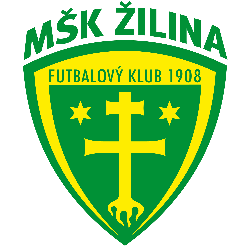

In [ ]:
cv2_imshow(img)

## Check shape and size

In [ ]:
print(img.shape)

(250, 250, 3)


In [ ]:
print(img.size)

187500


In [ ]:
250*250*3

187500

## Image channels

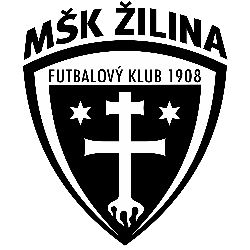

In [ ]:
b, g, r = cv2.split(img)

cv2_imshow(r)

In [ ]:
block = img[125:128, 125:128, 1]
print(block)
cv2_imshow(block)

[[237 237 237]
 [237 237 237]
 [237 237 237]]


# Resize image

### Make it smaller

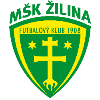

In [ ]:
img_smaller = cv2.resize(img, (100, 100))
cv2_imshow(img_smaller)

### Make it bigger

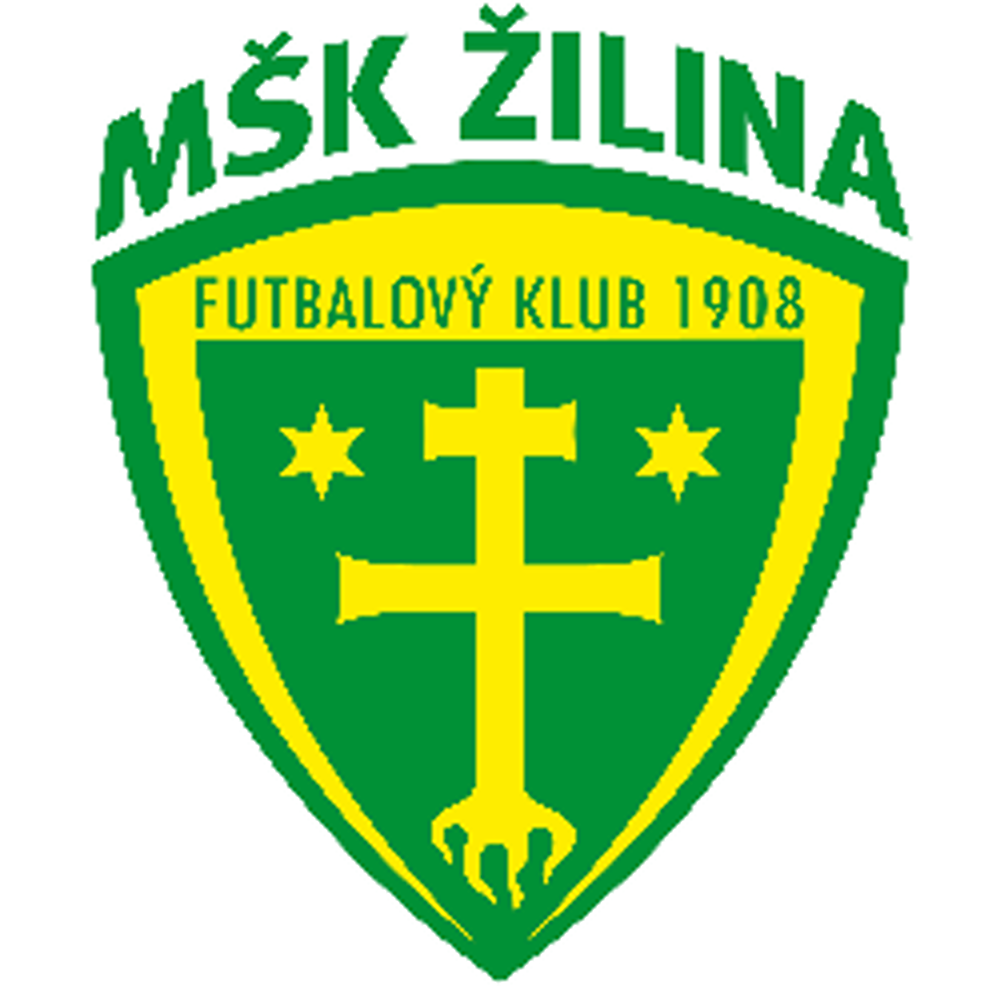

In [ ]:
img_bigger = cv2.resize(img, (1000, 1000), interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_bigger)

In [ ]:
print(img_bigger.shape)

(1000, 1000, 3)


In [ ]:
print(img_bigger.size)

187500


In [ ]:
1000*1000*3

18750000

# Crop image

In [ ]:
star = img[100:125, 60:100] # copy star
cv2_imshow(ball)

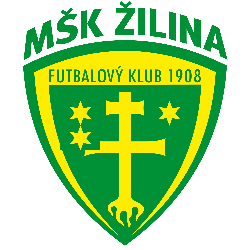

In [ ]:
img_2 = img
img_2[125:150, 60:100] = star
cv2_imshow(img_2)

# Overlay images

In [ ]:
photo = cv2.imread('zilina_photo.jpg')

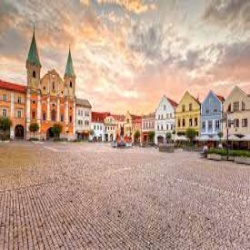

In [ ]:
cv2_imshow(photo)

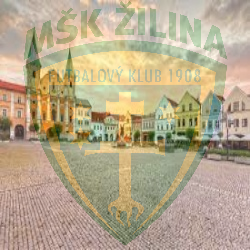

In [ ]:
dst = cv2.addWeighted(img, .2 , photo, .8 , 0) # img1, weight, img2, weight, gamma value
cv2_imshow(dst)

# Morphological operations

## Convert to grayscale

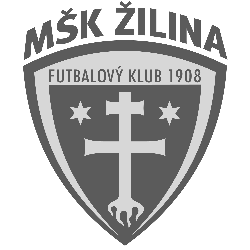

In [ ]:
img_gray = cv2.imread('msk_zilina.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_gray)

## Convert to binary

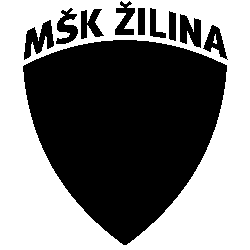

In [ ]:
_, mask = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY)
cv2_imshow(mask)

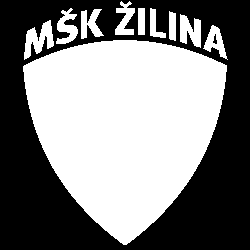

In [ ]:
_, mask = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(mask)

## Define kernel

In [ ]:
kernel = np.ones((3, 3), np.uint8)  # white square
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


### Dilation

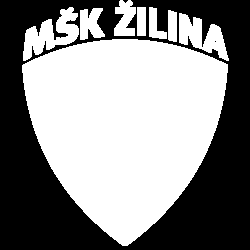

In [ ]:
dilation = cv2.dilate(mask, kernel, iterations=1) # You can play with the number of iterations
cv2_imshow(dilation)

### Erosion

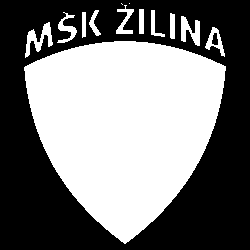

In [ ]:
erosion = cv2.erode(mask, kernel, iterations=1)
cv2_imshow(erosion)

### Morphological Gradient

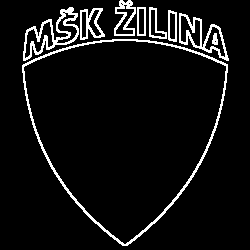

In [ ]:
gradient = dilation - erosion
cv2_imshow(gradient)

# Filters

## Blur

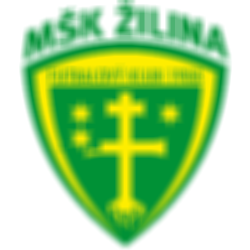

In [ ]:
blur = cv2.blur(img, (10, 10)) 
cv2_imshow(blur)

## Sharpen

https://en.wikipedia.org/wiki/Kernel_(image_processing)

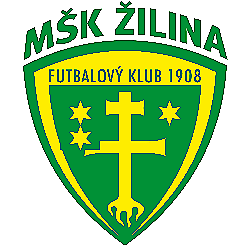

In [ ]:
kernel = np.array([[0,-1,0], 
                    [-1, 5,-1],
                    [0,-1,0]])
sharpened = cv2.filter2D(img, -1, kernel)
cv2_imshow(sharpened)

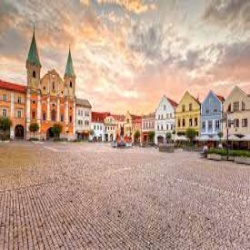

In [ ]:
sharpened = cv2.filter2D(photo, -1, kernel)
cv2_imshow(photo)

## Edge Detection

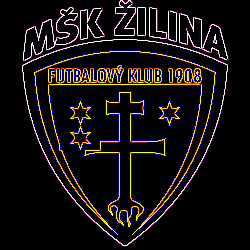

In [ ]:
kernel = np.array([[-1,-1,-1], 
                    [-1, 8,-1],
                    [-1,-1,-1]])
edges = cv2.filter2D(img, -1, kernel)
cv2_imshow(edges)

## Sepia

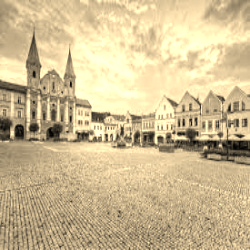

In [ ]:
kernel = np.array([[0.272, 0.534, 0.131],
                   [0.349, 0.686, 0.168],
                   [0.393, 0.769, 0.189]])

sepia_img=cv2.transform(photo, kernel)
cv2_imshow(sepia_img)

# Face Detection

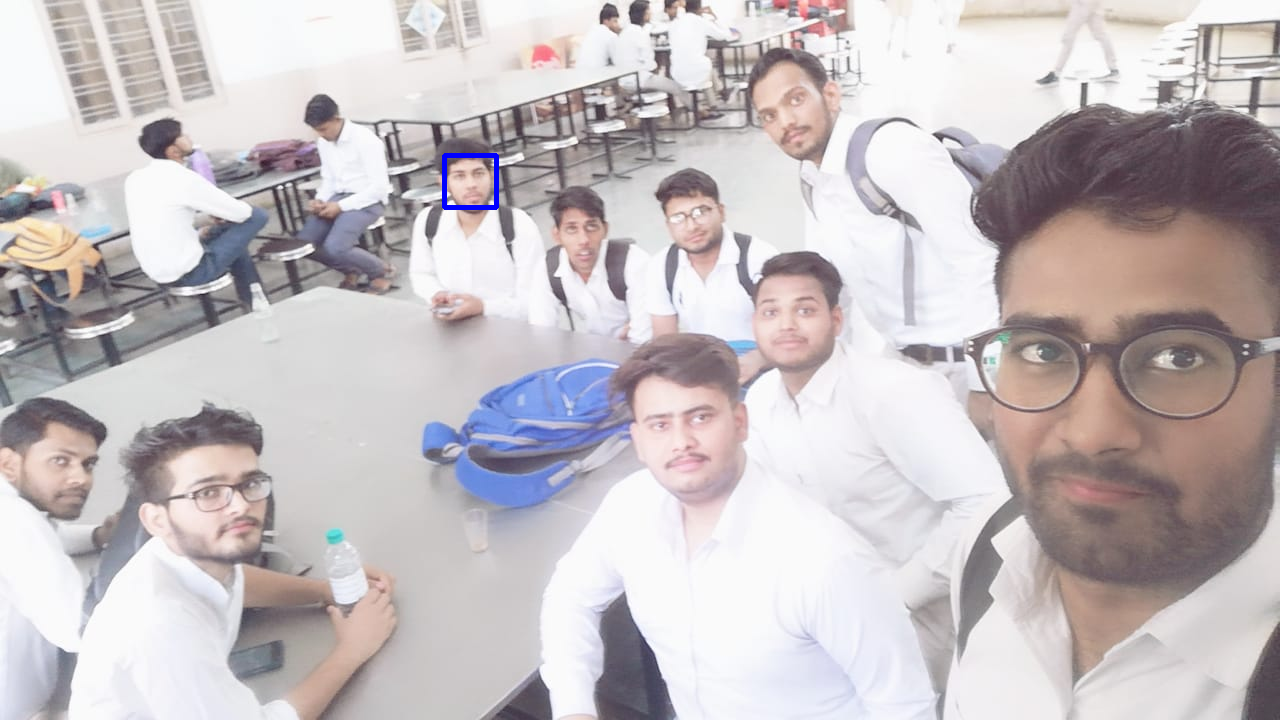

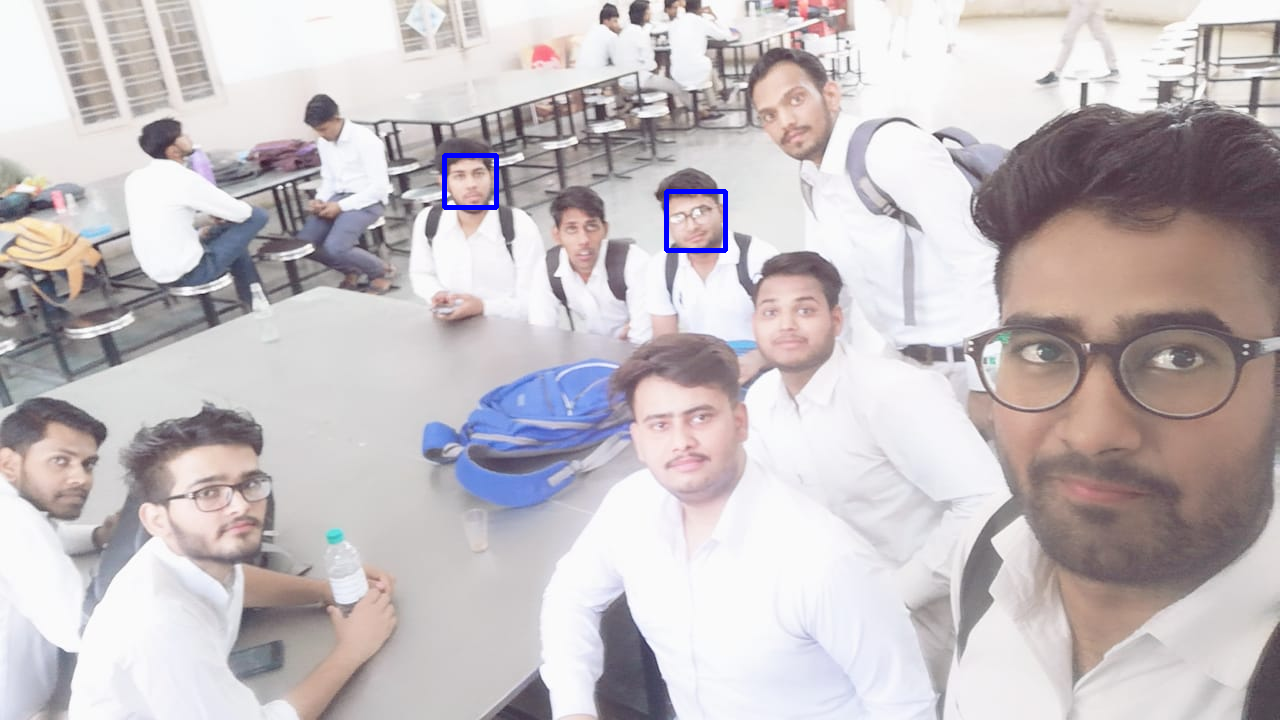

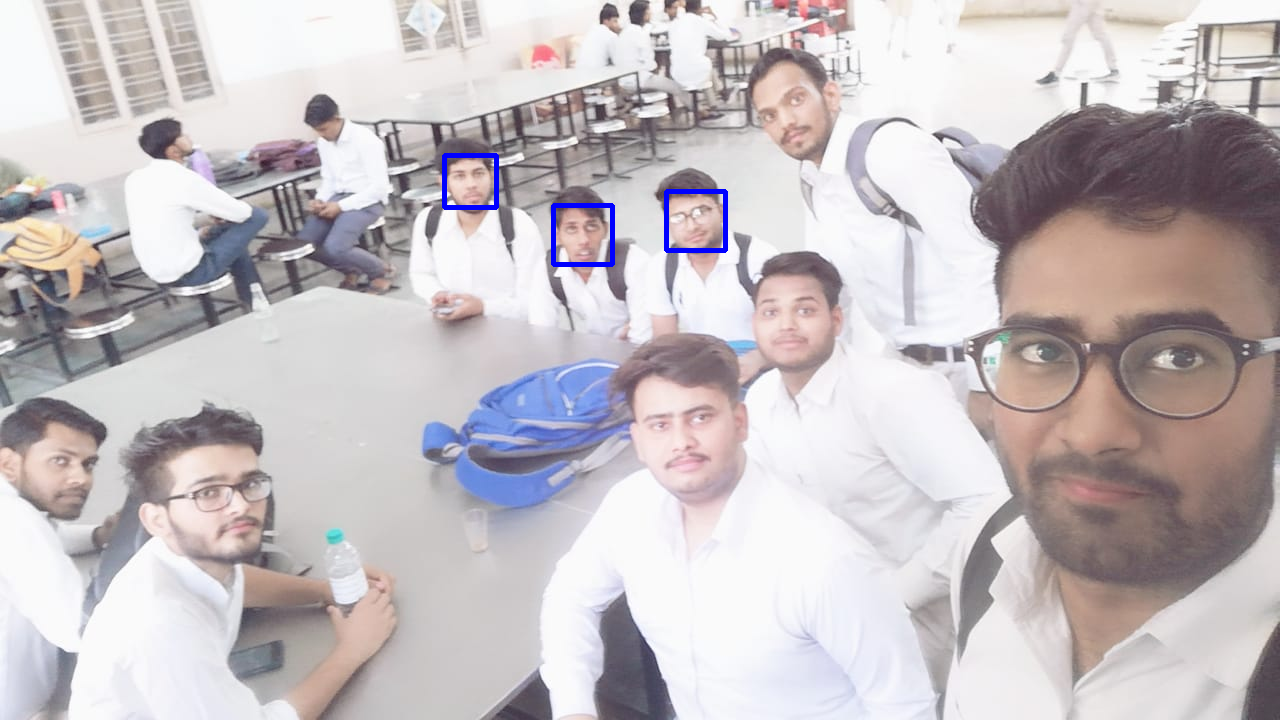

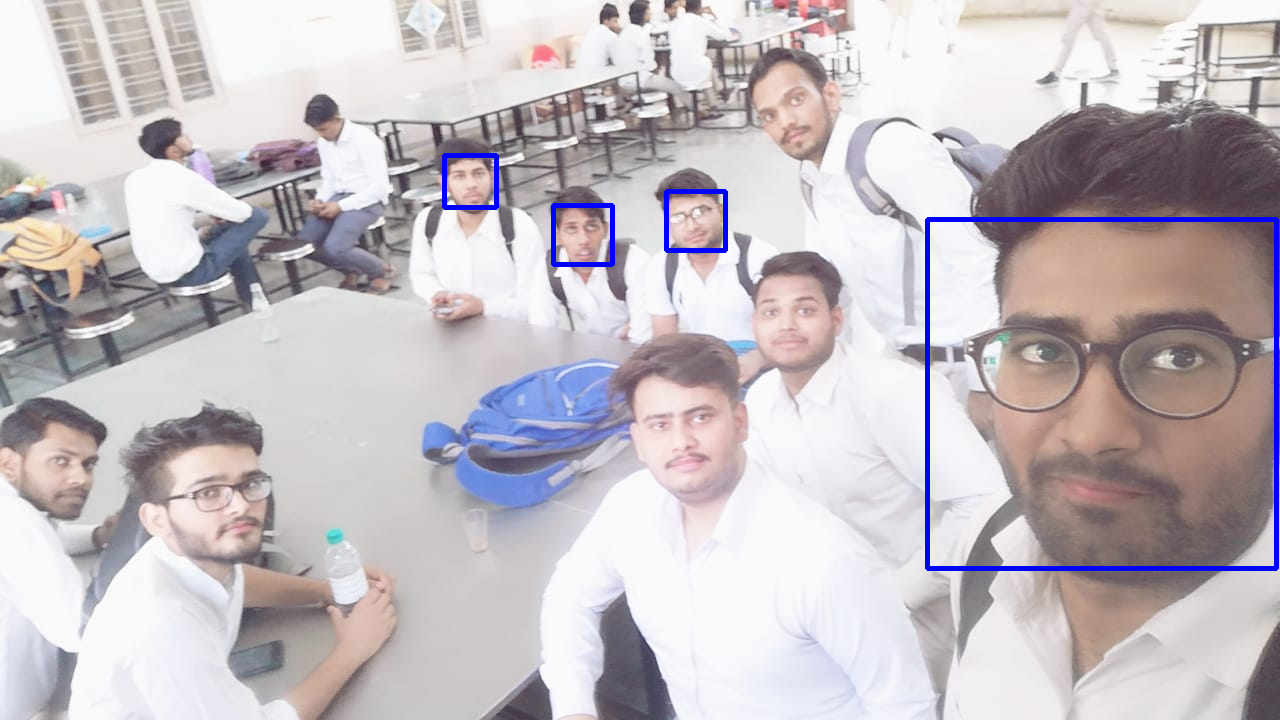

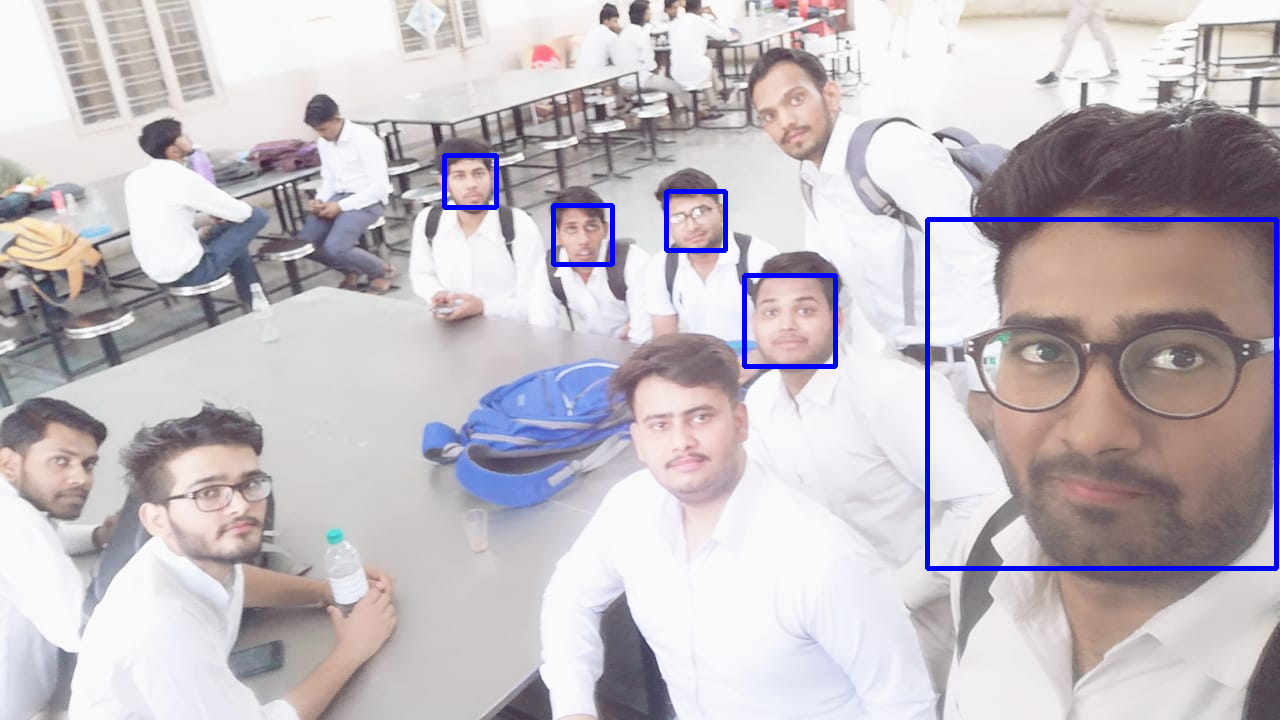

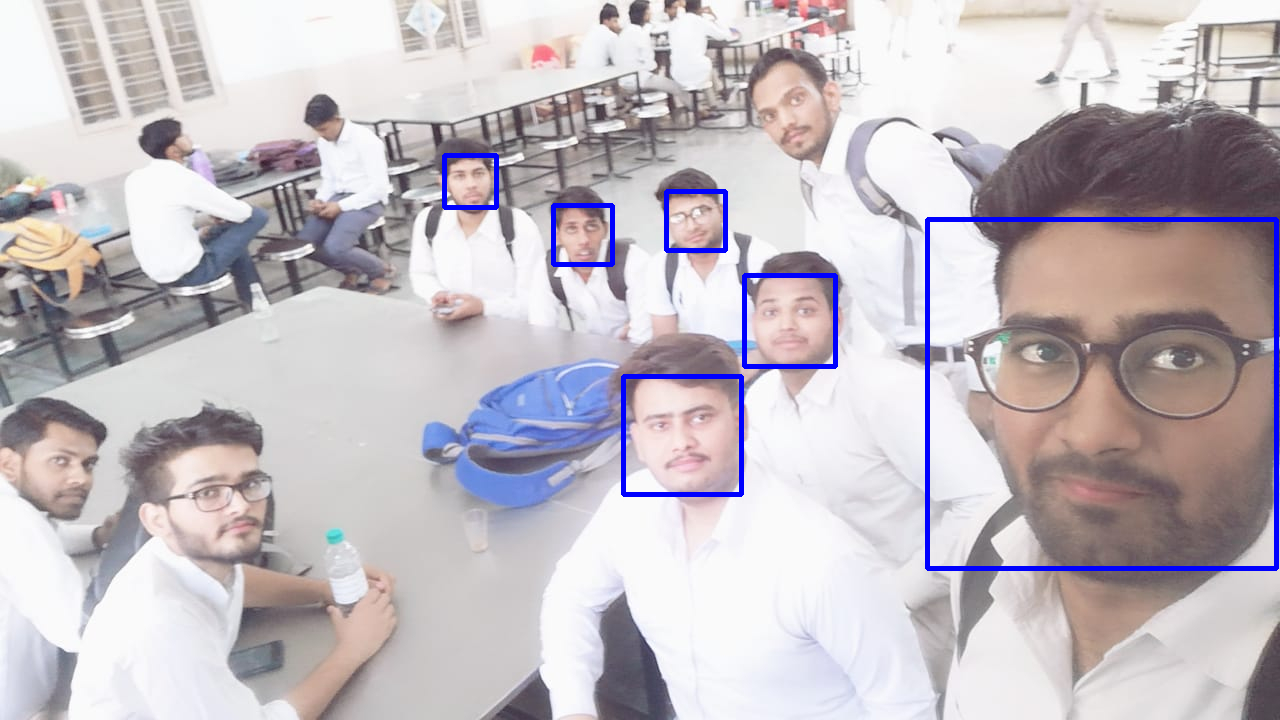

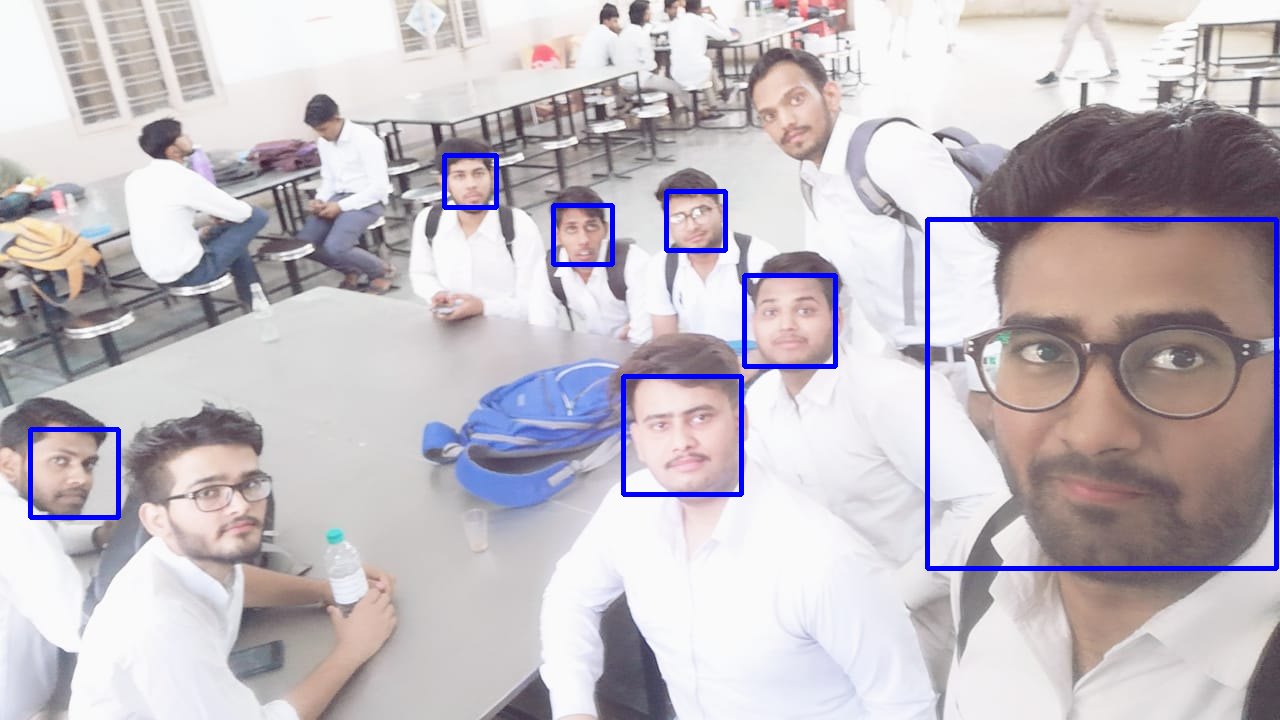

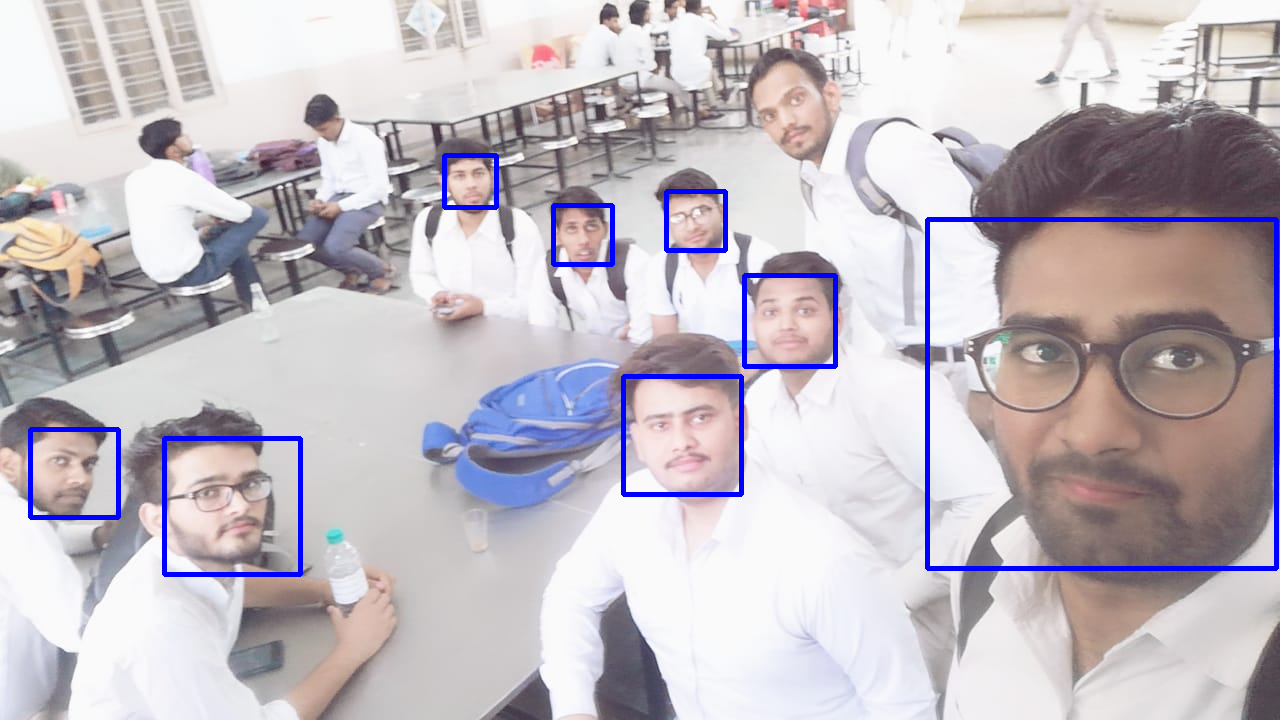

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # from opencv github repository
img = cv2.imread('faces_sample.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.2, 4)# image, scale factor - specify how much the image size is reduced at each image scale, minNeighbors - specify how many neighbours each candidate rectangle have to retain it.

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
    cv2_imshow(img)
